In [7]:
import pymysql
db = pymysql.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd = "root",
                     #passwd="KSAI@sbi1994",       # your password
                     db="Project")

In [8]:
# querystr = 'SELECT distinct count(*) FROM ACCIDENT_DATAS;'
querystr = "SELECT count(*) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '';"
cur = db.cursor()
cur.execute(querystr)

1

In [3]:
for row in cur.fetchall():
    print("Total number of cases are:")
    print(row)

Total number of cases are:
(748583,)


In [55]:
for row in cur.fetchall():
    print("Total number of cases are:")
    print(row)

In [56]:
# querystr = "SELECT COUNT(CustomerID), Country FROM ACCIDENT_DATAS GROUP BY Country;"
querystr = "SELECT BOROUGH,count(BOROUGH) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

5

In [57]:
borough = []
count = []
for row in cur.fetchall():
    borough.append(row[0])
    count.append(row[1])
#     print(row)

In [46]:
import seaborn as sns
sns.set()

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'] [100197, 230481, 188431, 196417, 33057]


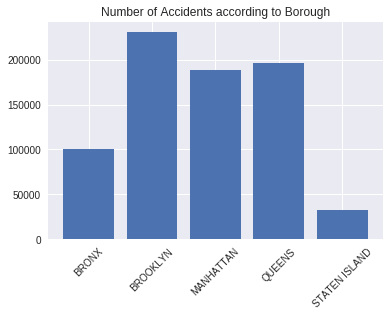

In [65]:
print(borough, count)
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
# sns.set()
a = [1,2,3,4,5]
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, borough)
plt.xticks(rotation=45)
plt.title('Number of Accidents according to Borough')
plt.show()


In [67]:
querystr = "SELECT BOROUGH,SUM(NUMBER_OF_PERSONS_KILLED) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

5

In [68]:
borough = []
count_killed = []
for row in cur.fetchall():
    borough.append(row[0])
    count_killed.append(row[1])
#     print(row)

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'] [Decimal('109'), Decimal('260'), Decimal('157'), Decimal('232'), Decimal('42')]


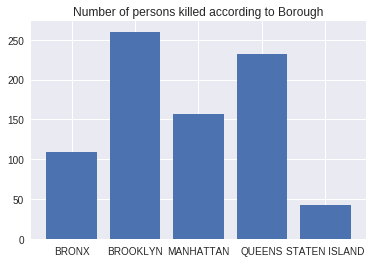

In [69]:
print(borough, count_killed)
import matplotlib.pyplot as plt
%matplotlib inline

a = [1,2,3,4,5]
# b = df.value_counts()
plt.bar(a, count_killed, align='center')
plt.xticks(a, borough)
plt.title('Number of persons killed according to Borough')
plt.show()


['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'] [Decimal('28659'), Decimal('66624'), Decimal('31925'), Decimal('50361'), Decimal('7980')]


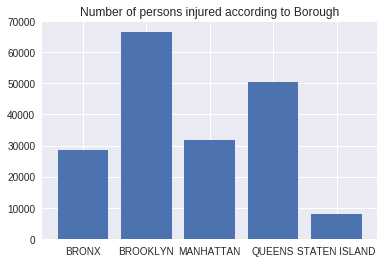

In [70]:
querystr = "SELECT BOROUGH,SUM(NUMBER_OF_PERSONS_INJURED) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

borough = []
count_killed = []
for row in cur.fetchall():
    borough.append(row[0])
    count_killed.append(row[1])
#     print(row)

print(borough, count_killed)
import matplotlib.pyplot as plt
%matplotlib inline

a = [1,2,3,4,5]
# b = df.value_counts()
plt.bar(a, count_killed, align='center')
plt.xticks(a, borough)
plt.title('Number of persons injured according to Borough')
plt.show()


In [130]:
querystr = '''SELECT CONTRIBUTING_FACTOR_VEHICLE_1,COUNT(*) as count
FROM ACCIDENT_DATA
WHERE CONTRIBUTING_FACTOR_VEHICLE_1 IS NOT NULL and CONTRIBUTING_FACTOR_VEHICLE_1 <> "" and CONTRIBUTING_FACTOR_VEHICLE_1 <>"Unspecified"
group by CONTRIBUTING_FACTOR_VEHICLE_1 
order by count DESC LIMIT 10 ;'''
cur = db.cursor()
cur.execute(querystr)

borough = []
count_killed = []
for row in cur.fetchall():
    borough.append(row[0])
    count_killed.append(row[1])
print(borough, count_killed)

['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Fatigued/Drowsy', 'Backing Unsafely', 'Other Vehicular', 'Following Too Closely', 'Turning Improperly', 'Lost Consciousness', 'Traffic Control Disregarded', 'Prescription Medication'] [155847, 49993, 43167, 33548, 32293, 27443, 25966, 17968, 14302, 14005]


In [72]:
print(borough, count_killed)

['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Fatigued/Drowsy', 'Backing Unsafely', 'Other Vehicular', 'Following Too Closely', 'Turning Improperly', 'Lost Consciousness', 'Traffic Control Disregarded', 'Prescription Medication'] [155847, 49993, 43167, 33548, 32293, 27443, 25966, 17968, 14302, 14005]


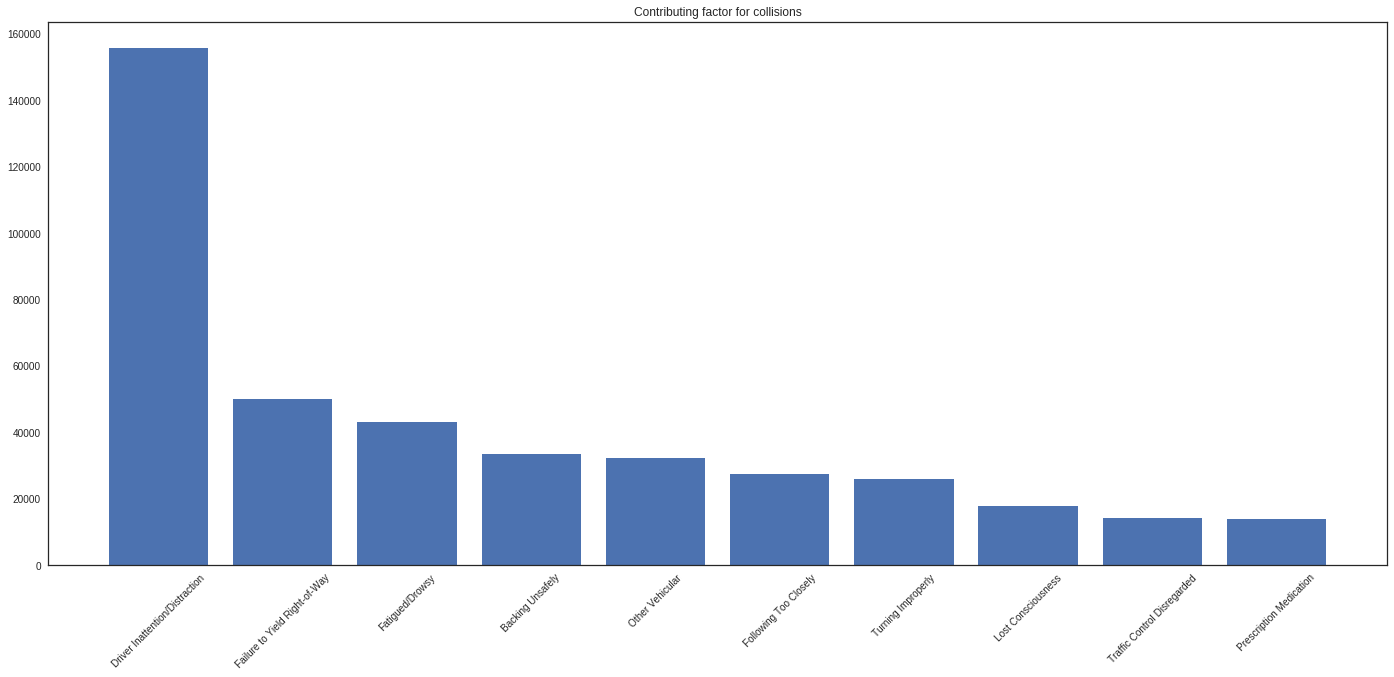

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

a = [1,2,3,4,5,6,7,8,9,10]
fig=plt.figure(figsize=[24,10])
# b = df.value_counts()
plt.bar(a, count_killed, align='center')
plt.xticks(a, borough, rotation = 45)
plt.title('Contributing factor for collisions')
plt.show()

In [74]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA 
where VEHICLE_TYPE_CODE_1 <> "" AND VEHICLE_TYPE_CODE_1 <> "Unspecified" 
group by VEHICLE_TYPE_CODE_1 
order by count DESC 
LIMIT 5;'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])
print(vehicle_type, count)

['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'VAN', 'OTHER'] [602315, 253444, 40338, 23444, 21864]


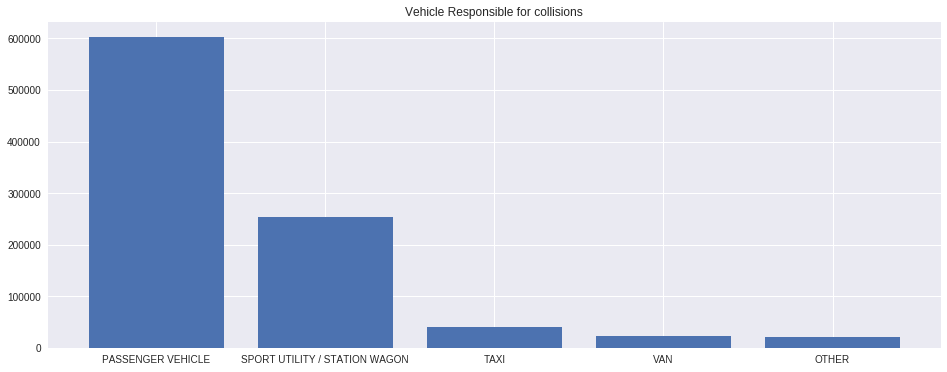

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

a = [1,2,3,4,5]
fig=plt.figure(figsize=[16,6])
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, vehicle_type)
plt.title('Vehicle Responsible for collisions')
plt.show()

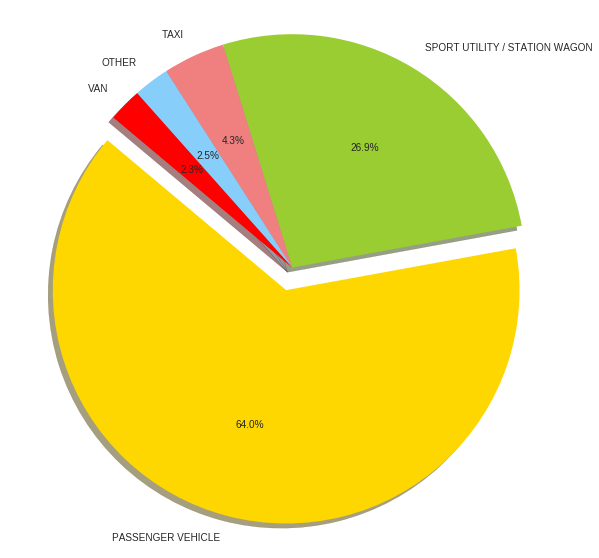

In [76]:
labels = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'OTHER', 'VAN']
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [29]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, VEHICLE_TYPE_CODE_2 from ACCIDENT_DATA 
where VEHICLE_TYPE_CODE_2 <> "" AND VEHICLE_TYPE_CODE_2 <> "Unspecified" AND VEHICLE_TYPE_CODE_1='PASSENGER VEHICLE'
group by VEHICLE_TYPE_CODE_2 
order by count DESC 
LIMIT 5;'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])
print(vehicle_type, count)

['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'UNKNOWN', 'TAXI', 'BICYCLE'] [297218, 86617, 41967, 13217, 12360]


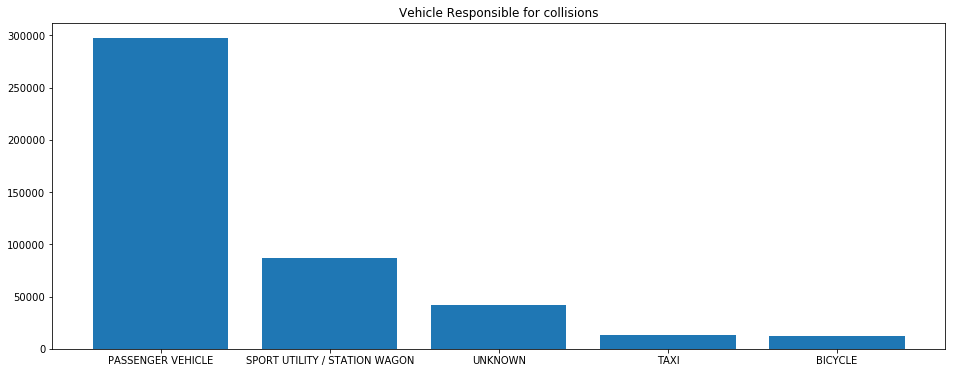

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

a = [1,2,3,4,5]
fig=plt.figure(figsize=[16,6])
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, vehicle_type)
plt.title('Vehicle Responsible for collisions')
plt.show()

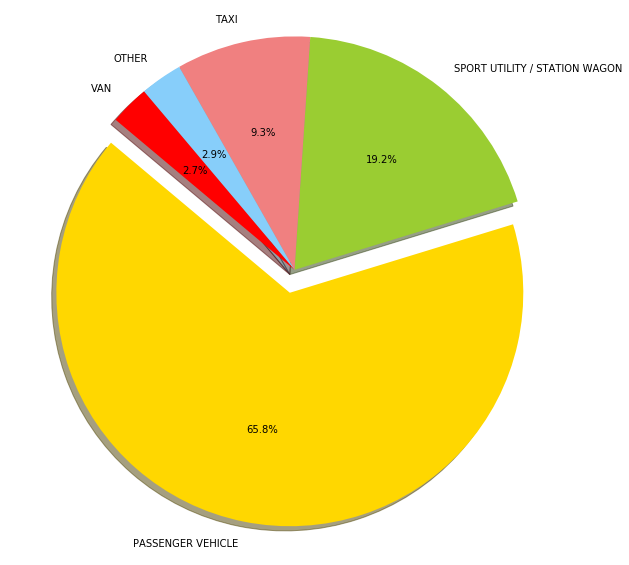

In [31]:
labels = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'OTHER', 'VAN']
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [132]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, ON_STREET_NAME from ACCIDENT_DATA
where ON_STREET_NAME IS NOT NULL AND ON_STREET_NAME<>" "
group by ON_STREET_NAME 
order by count desc limit 10;
'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])
print(vehicle_type, count)

['BROADWAY                        ', 'ATLANTIC AVENUE                 ', 'NORTHERN BOULEVARD              ', '3 AVENUE                        ', 'FLATBUSH AVENUE                 ', 'QUEENS BOULEVARD                ', 'LINDEN BOULEVARD                ', '2 AVENUE                        ', 'BRUCKNER BOULEVARD              ', '5 AVENUE                        '] [10854, 9642, 7535, 7433, 6374, 6154, 5772, 5415, 4624, 4330]


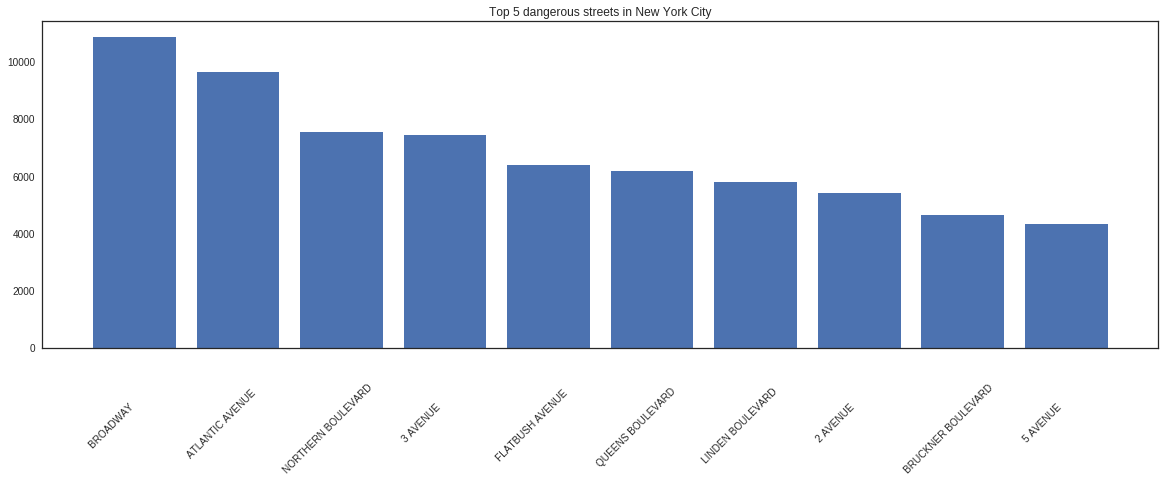

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

a = [1,2,3,4,5,6,7,8,9,10]
fig=plt.figure(figsize=[20,6])
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, vehicle_type, rotation = 45)
plt.title('Top 5 dangerous streets in New York City')
plt.show()

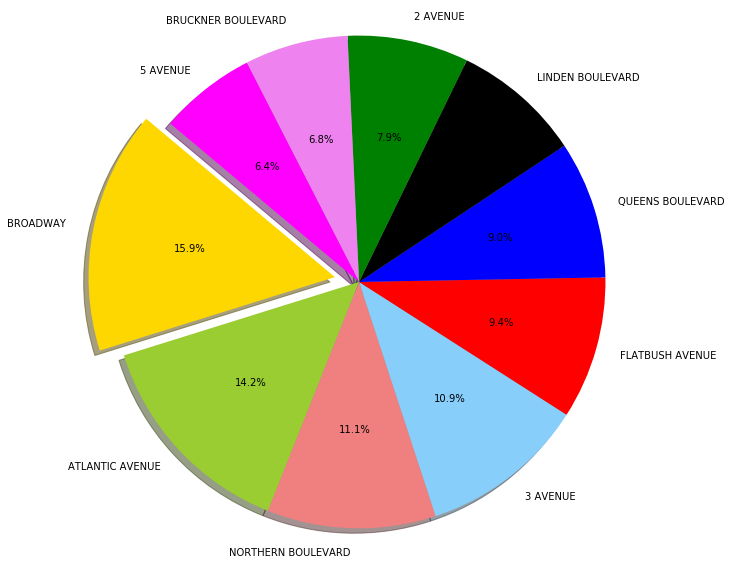

In [35]:
labels = ['BROADWAY ','ATLANTIC AVENUE', 'NORTHERN BOULEVARD', '3 AVENUE ', 'FLATBUSH AVENUE', 'QUEENS BOULEVARD', 'LINDEN BOULEVARD', '2 AVENUE ', 'BRUCKNER BOULEVARD ', '5 AVENUE']
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','black','green','violet','magenta']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [203]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, hour(time) from ACCIDENT_DATA
where time IS NOT NULL AND time<>" "
group by hour(time) 
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

hour = []
count = []
for row in cur.fetchall():
    hour.append(row[1])
    count.append(row[0])


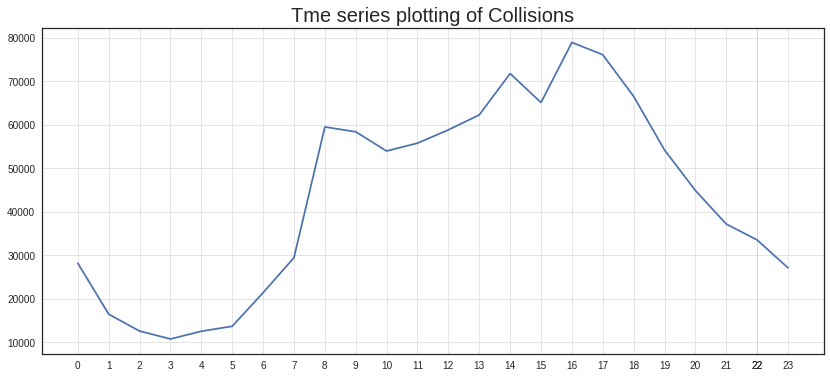

In [222]:
a = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,22,23]
fig=plt.figure(figsize=[14,6])
plt.plot(hour, count)
plt.xticks(a)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Tme series plotting of Collisions', size = 20)
plt.show()


[444, 192, 152, 119, 151, 246, 501, 620, 1228, 1352, 1395, 1352, 1438, 1499, 1513, 1265, 1456, 1276, 981, 692, 553, 481, 418, 297]
[104, 61, 36, 30, 24, 49, 228, 550, 1212, 907, 717, 562, 518, 660, 889, 1008, 1287, 1018, 793, 564, 406, 280, 222, 132]
[1885, 1398, 1083, 910, 936, 756, 847, 914, 1664, 1855, 1893, 1840, 1892, 2025, 2311, 1962, 2355, 2189, 2146, 2041, 1953, 1942, 1871, 1670]
[17230, 9989, 7612, 6492, 7574, 8014, 12231, 16700, 33105, 31996, 29050, 30304, 32563, 34447, 40357, 37148, 45239, 44332, 39572, 32288, 26831, 22363, 20246, 16632]


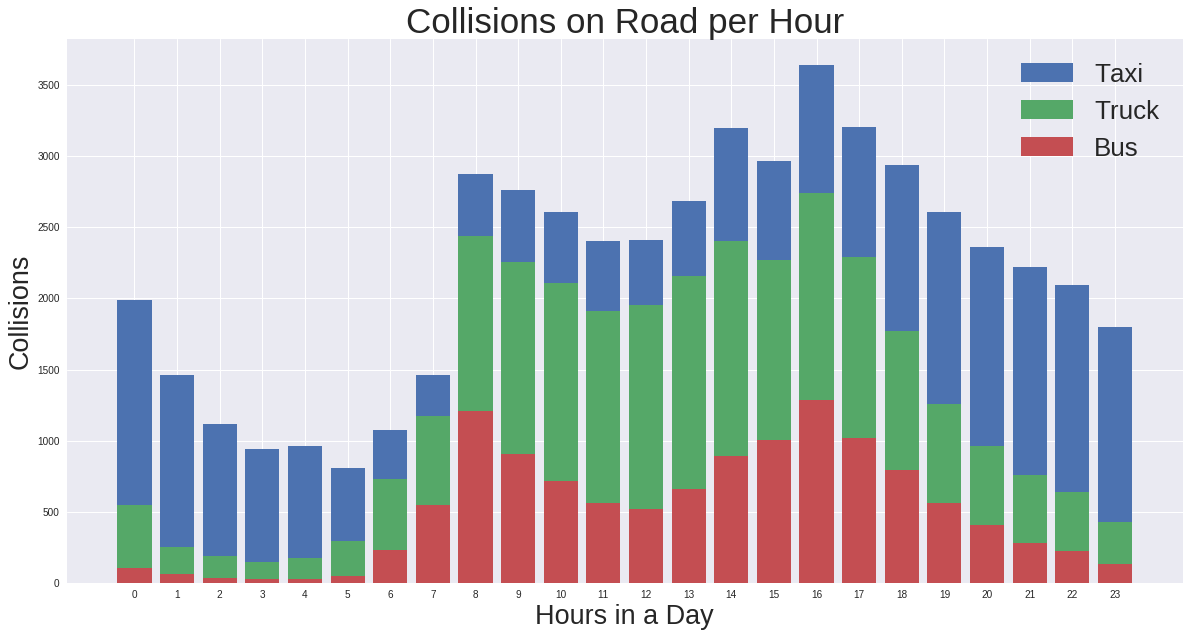

In [134]:
querystr = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 = "BUS" or VEHICLE_TYPE_CODE_1 = "TAXI" or VEHICLE_TYPE_CODE_1 = "PASSENGER VEHICLE" or VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

querystr1 = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;'''
cur1 = db.cursor()
cur1.execute(querystr1)

truck = [0]*24
for row in cur1.fetchall():
    truck[row[1]] += row[0]

print(truck)
    

bus = []
vehicle = []
taxi = []
for row in cur.fetchall():
    cnt = 0
    if row[2] == "BUS":
        bus.append(row[0])
    elif row[2] == "PASSENGER VEHICLE":
        vehicle.append(row[0])
    elif row[2] == "TAXI":
        taxi.append(row[0])

print(bus)
print(taxi)
print(vehicle)

X = list(range(24))
fig=plt.figure(figsize=[20,10])
# p4 = plt.bar(X, vehicle, bottom = bus)
p1 = plt.bar(X, taxi, bottom = bus)
p2 = plt.bar(X, truck, bottom = bus)
p3 = plt.bar(X, bus)
# plt.legend((p4[0],p1[0],p2[0],p3[0]), ("Passenger Vehicle","Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.legend((p1[0],p2[0],p3[0]), ("Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.xlabel("Hours in a Day", size=27)
plt.ylabel("Collisions", size=27)
plt.title('Collisions on Road per Hour', size=35)
plt.xticks(X)
plt.show()

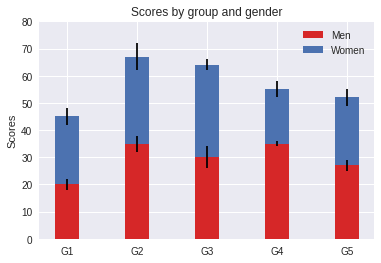

In [93]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

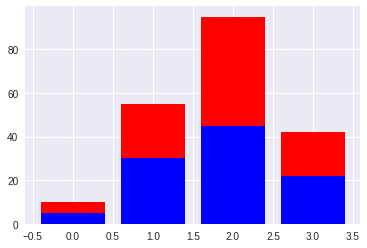

In [96]:
import matplotlib.pyplot as plt

A = [5., 30., 45., 22.]
B = [5., 25., 50., 20.]

X = range(4)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.show()

In [39]:
from bigquery import get_client

ModuleNotFoundError: No module named 'bigquery'

In [ ]:
select sum(HOURLY_PRECIP) as s,hour(date) from WEATHER_DATA group by hour(date) order by s desc limit 3;

In [45]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select sum(HOURLY_PRECIP) as s,hour(date) from WEATHER_DATA group by hour(date) order by hour(date) asc;'''
cur = db.cursor()
cur.execute(querystr)

hour_w = []
count_w = []
for row in cur.fetchall():
    hour_w.append(row[1])
    count_w.append(row[0])
print(hour, count)

ProgrammingError: (1146, "Table 'Project.WEATHER_DATA' doesn't exist")

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

#a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,22,23]
fig=plt.figure(figsize=[14,6])
# b = df.value_counts()
#plt.bar(hour,count,align='center')
for i in range(1,len(count_w)):
    count_w[i] = count_w[i]*5000
plt.plot(hour_w, count_w, label = 'Weather')
plt.plot(hour,count, label = 'Accidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xticks(a, vehicle_type)
plt.title('Time series plotting of Collisions')
plt.show()

NameError: name 'count_w' is not defined

In [6]:
from IPython.display import HTML, display

data = [[1,2,3], [4,5,6],[7,8,9]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

1,2,3
4,5,6
7,8,9


In [14]:
import folium
import json
map_osm = folium.Map(location=[45.5236, -122.6750])

In [13]:
map_osm

#    Creating Scatter Plot of Data

In [71]:
querystr = "SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA;"
cur = db.cursor()
cur.execute(querystr)

1048573

In [72]:
lat = []
lon = []
for row in cur.fetchall():
    lat.append(row[0])
    lon.append(row[1])

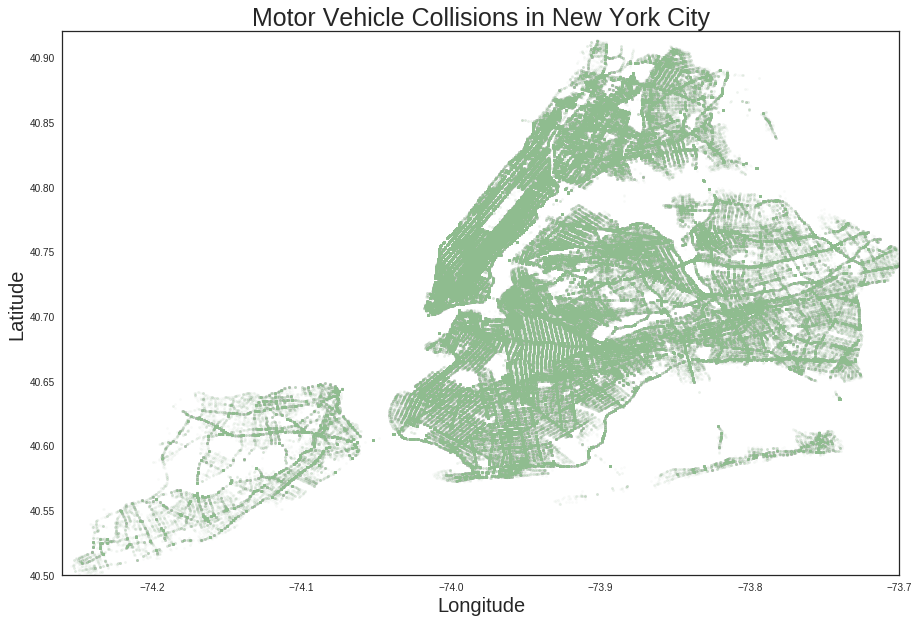

In [103]:
import seaborn as sns
%matplotlib inline
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# lat1 = pd.DataFrame({'la':lat})
# lon1 = pd.DataFrame({'lo':lon})
sns.set_style("white")
plt.figure(figsize=(15,10))

plt.scatter(lon, lat, alpha=0.05, s=4, color='darkseagreen')

plt.title('Motor Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

## scatter plot with information about city boroughs

In [83]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> ''"
cur = db.cursor()
cur.execute(querystr)

748583

In [84]:
lat1 = [] 
lon1 = []
lat2 = []
lon2 = []
lat3 = []
lon3 = []
lat4 = []
lon4 = []
lat5 = []
lon5 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat1.append(row[0])
        lon1.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat2.append(row[0])
        lon2.append(row[1])
    elif row[2] == 'BRONX':
        lat3.append(row[0])
        lon3.append(row[1])
    elif row[2] == 'QUEENS':
        lat4.append(row[0])
        lon4.append(row[1])
    else:
        lat5.append(row[0])
        lon5.append(row[1])

In [102]:
len(lat1)

188431

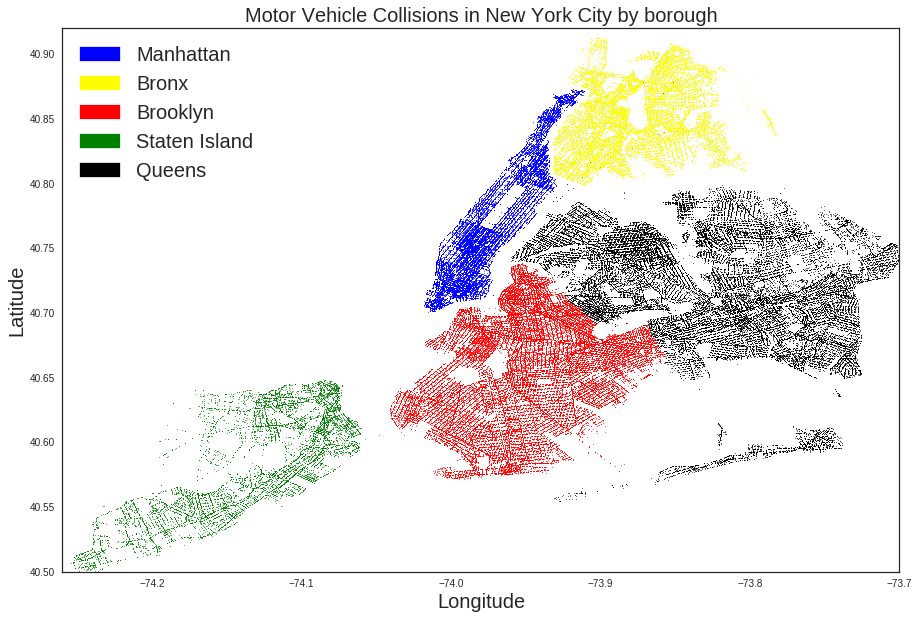

In [115]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 1 - Manhattan, 2-Brooklyn, 3-Bronx, 4-Queens, 5-Staten Island
plt.figure(figsize=(15,10))

plt.scatter(lon1, lat1, s=1, color='blue', marker ='.')
plt.scatter(lon3, lat3, s=1, color='yellow', marker ='.')
plt.scatter(lon2, lat2, color='red', s=1, marker ='.')
plt.scatter(lon5, lat5, s=1, color='green', marker ='.')
plt.scatter(lon4, lat4, s=1, color='black', marker ='.')

blue_patch = mpatches.Patch(label='Manhattan', color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Bronx')
red_patch = mpatches.Patch(color='red', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Staten Island')
black_patch = mpatches.Patch(color='black', label='Queens')
plt.legend([blue_patch, yellow_patch, red_patch, green_patch, black_patch],
           ('Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens'), 
           loc='upper left', prop={'size':20})

plt.title('Motor Vehicle Collisions in New York City by borough', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

In [126]:
querystr = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED <> 0; '''
querystr1 = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED = 0 and NUMBER_OF_PERSONS_INJURED <> 0;'''
querystr2 = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED = 0 and NUMBER_OF_PERSONS_INJURED = 0;'''
cur = db.cursor()
cur1 = db.cursor()
cur2 = db.cursor()
cur.execute(querystr)
cur1.execute(querystr1)
cur2.execute(querystr2)

609028

In [127]:
killed_lat = []
killed_lon = []
injured_lat = []
injured_lon = []
non_lat = []
non_lon = []
for row in cur.fetchall():
    killed_lat.append(row[0])
    killed_lon.append(row[1])

for row in cur1.fetchall():
    injured_lat.append(row[0])
    injured_lon.append(row[1])
    
for row in cur2.fetchall():
    non_lat.append(row[0])
    non_lon.append(row[1])    

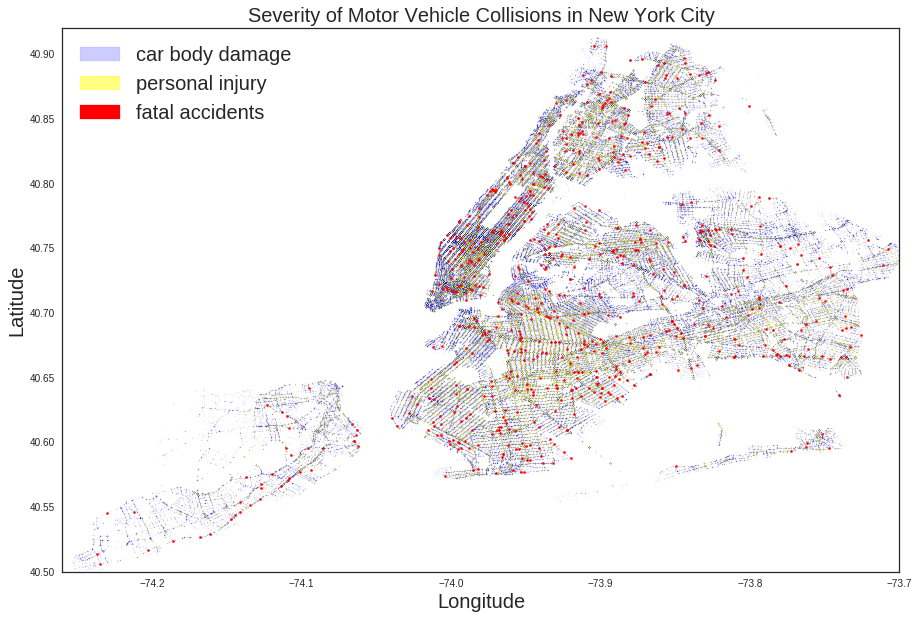

In [128]:
plt.figure(figsize=(15,10))
plt.scatter(non_lon, non_lat, alpha=0.04, s=1, color='blue')
plt.scatter(injured_lon, injured_lat, alpha=0.1, s=1, color='yellow')
plt.scatter(killed_lon, killed_lat, color='red', s=5)

blue_patch = mpatches.Patch( label='car body damage', alpha=0.2, color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='personal injury', alpha=0.5)
red_patch = mpatches.Patch(color='red', label='lethal accidents')
plt.legend([blue_patch, yellow_patch, red_patch],('car body damage', 'personal injury', 'fatal accidents'), 
           loc='upper left', prop={'size':20})

plt.title('Severity of Motor Vehicle Collisions in New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

## Obtaining Streets with most collisions 

In [196]:
# querystr = '''select ON_STREET_NAME, LATITUDE, LONGITUDE from ACCIDENT_DATA where (ON_STREET_NAME = "BROADWAY" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "ATLANTIC AVENUE" AND BOROUGH = "BROOKLYN") or (ON_STREET_NAME = "NORTHERN BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "BRONX") or (ON_STREET_NAME = "FLATBUSH AVENUE" AND BOROUGH = "BROOKLYN") or (ON_STREET_NAME = "QUEENS BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "LINDEN BOULEVARD") or (ON_STREET_NAME = "2 AVENUE" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "BRUCKNER BOULEVARD" AND BOROUGH = "BRONX") or (ON_STREET_NAME = "5 AVENUE" AND BOROUGH = "MANHATTAN");'''
querystr = '''select ON_STREET_NAME,LATITUDE, LONGITUDE from ACCIDENT_DATA 
where ((ON_STREET_NAME = "BROADWAY" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "ATLANTIC AVENUE" AND BOROUGH = "BROOKLYN") 
or (ON_STREET_NAME = "NORTHERN BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "MANHATTAN") 
or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "BRONX") or (ON_STREET_NAME = "FLATBUSH AVENUE" AND BOROUGH = "BROOKLYN") 
or (ON_STREET_NAME = "QUEENS BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "LINDEN BOULEVARD") 
or (ON_STREET_NAME = "2 AVENUE" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "BRUCKNER BOULEVARD" AND BOROUGH = "BRONX") 
or (ON_STREET_NAME = "5 AVENUE" AND BOROUGH = "MANHATTAN")) AND LATITUDE <> 0 AND LONGITUDE <> 0;'''
cur = db.cursor()
cur.execute(querystr)

42991

In [197]:
lat1 = [] 
lon1 = []
lat2 = []
lon2 = []
lat3 = []
lon3 = []
lat4 = []
lon4 = []
lat5 = []
lon5 = []
lat6 = [] 
lon6 = []
lat7 = []
lon7 = []
lat8 = []
lon8 = []
lat9 = []
lon9 = []
lat10 = []
lon10 = []
for row in cur.fetchall():
    if row[0].strip() == 'BROADWAY':
        lat1.append(row[1])
        lon1.append(row[2])
    elif row[0].strip() == 'ATLANTIC AVENUE':
        lat2.append(row[1])
        lon2.append(row[2])
    elif row[0].strip() == 'NORTHERN BOULEVARD':
        lat3.append(row[1])
        lon3.append(row[2])
    elif row[0].strip() == '3 AVENUE':
        lat4.append(row[1])
        lon4.append(row[2])
    elif row[0].strip() == 'FLATBUSH AVENUE':
        lat5.append(row[1])
        lon5.append(row[2])
    elif row[0].strip() == 'QUEENS BOULEVARD':
        lat6.append(row[1])
        lon6.append(row[2])
    elif row[0].strip() == 'LINDEN BOULEVARD':
        lat7.append(row[1])
        lon7.append(row[2])
    elif row[0].strip() == '2 AVENUE':
        lat8.append(row[1])
        lon8.append(row[2])
    elif row[0].strip() == 'BRUCKNER BOULEVARD':
        lat9.append(row[1])
        lon9.append(row[2])
    elif row[0].strip() == '5 AVENUE':
        lat10.append(row[1])
        lon10.append(row[2])

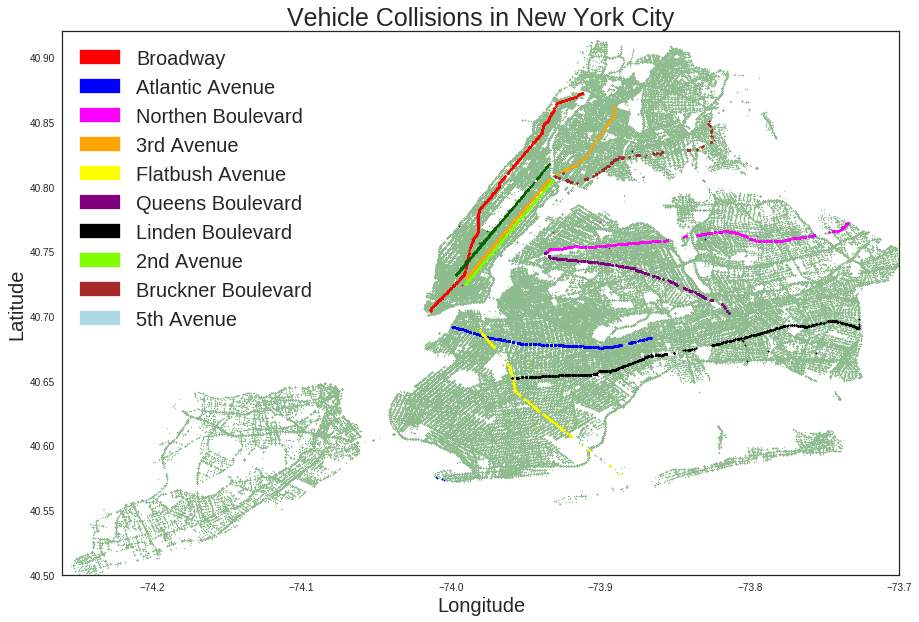

In [198]:
plt.figure(figsize=(15,10))

plt.scatter(lon, lat, s=1, color='darkseagreen')
plt.scatter(lon1, lat1, s=2, color='red')
plt.scatter(lon2, lat2, color='blue', s=2)
plt.scatter(lon3, lat3, s=2, color='magenta')
plt.scatter(lon4, lat4, color='orange', s=2)
plt.scatter(lon5, lat5, s=2, color='yellow')
plt.scatter(lon6, lat6, color='purple', s=2)
plt.scatter(lon7, lat7, s=2, color='black')
plt.scatter(lon8, lat8, color='chartreuse', s=2)
plt.scatter(lon9, lat9, s=2, color='brown')
plt.scatter(lon10, lat10, color='darkgreen', s=2)


a_patch = mpatches.Patch(color='red', label='Broadway')
b_patch = mpatches.Patch(color='blue', label='Atlantic Avenue')
c_patch = mpatches.Patch(color='magenta', label='Northen Boulevard')
d_patch = mpatches.Patch(color='orange', label='3rd Avenue')
e_patch = mpatches.Patch(color='yellow', label='Flatbush Avenue')
f_patch = mpatches.Patch(color='purple', label='Queens Boulevard')
g_patch = mpatches.Patch(color='black', label='Linden Boulevard')
h_patch = mpatches.Patch(color='chartreuse', label='2nd Avenue')
i_patch = mpatches.Patch(color='brown', label='Bruckner Boulevard')
j_patch = mpatches.Patch(color='lightblue', label='5th Avenue')

plt.legend([a_patch, b_patch, c_patch, d_patch, e_patch, f_patch, g_patch, h_patch, i_patch, j_patch],
           ('Broadway', 'Atlantic Avenue', 'Northen Boulevard', '3rd Avenue', 'Flatbush Avenue', 'Queens Boulevard',
            'Linden Boulevard', '2nd Avenue', 'Bruckner Boulevard', '5th Avenue'), 
           loc='upper left', prop={'size':20})

plt.title('Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()